## Data

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import os
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
trainingRaw = pd.read_csv('/content/drive/MyDrive/CS5228_HDBProject/data/train.csv')
training = trainingRaw
mrtRaw = pd.read_csv('/content/drive/MyDrive/CS5228_HDBProject/data/sg-mrt-existing-stations.csv')
mrt = mrtRaw

## Preprocessing

In [191]:
mrtRaw.head()

,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


In [192]:
mrtRaw.describe().drop('count')

,opening_year,latitude,longitude
mean,2005.518519,1.328215,103.837021
std,12.320877,0.042078,0.062299
min,1987.000000,1.265311,103.636991
25%,1990.000000,1.298689,103.806756
50%,2010.000000,1.320619,103.845499
75%,2016.500000,1.347939,103.866794
max,2022.000000,1.449027,103.987884


In [193]:
mrtRaw.dtypes

code             object
name             object
opening_year      int64
latitude        float64
longitude       float64
dtype: object

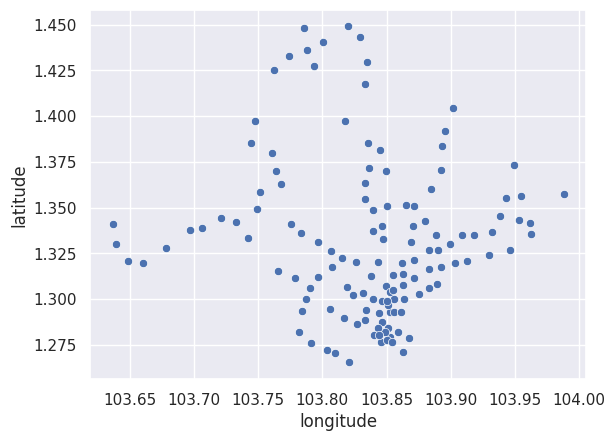

In [194]:
sns.scatterplot(x = mrtRaw['longitude'], y = mrtRaw['latitude'])
plt.show()

## Clustering

In [196]:
from sklearn.cluster import KMeans

points=[]
init_centroids_circle=[]
init_centroids_downtown=[]
init_centroids_eastwest=[]
init_centroids_northeast=[]
init_centroids_northsouth=[]
init_centroids_thomsoneastcoast=[]

for index in training.index:
    points.append([training['longitude'][index], training['latitude'][index]])
for index in mrt.index:
    if "CE" in mrt['code'][index] or "CC" in mrt['code'][index] or "CG" in mrt['code'][index]:
        init_centroids_circle.append([mrt['longitude'][index], mrt['latitude'][index]])
    if "DT" in mrt['code'][index]:
        init_centroids_downtown.append([mrt['longitude'][index], mrt['latitude'][index]])
    if "EW" in mrt['code'][index]:
        init_centroids_eastwest.append([mrt['longitude'][index], mrt['latitude'][index]])
    if "NE" in mrt['code'][index]:
        init_centroids_northeast.append([mrt['longitude'][index], mrt['latitude'][index]])
    if "NS" in mrt['code'][index]:
        init_centroids_northsouth.append([mrt['longitude'][index], mrt['latitude'][index]])
    if "TE" in mrt['code'][index]:
        init_centroids_thomsoneastcoast.append([mrt['longitude'][index], mrt['latitude'][index]])



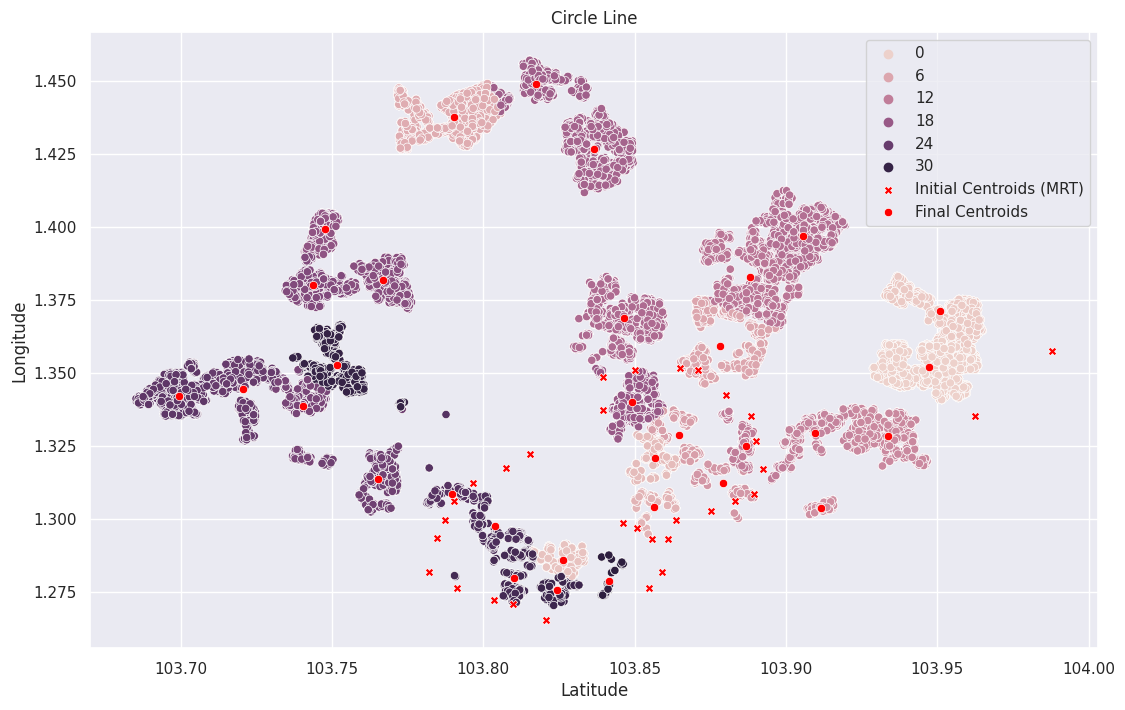

In [197]:
kmeans = KMeans(n_clusters=32, init=init_centroids_circle, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_circle], y=[item[1] for item in init_centroids_circle], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('Circle Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

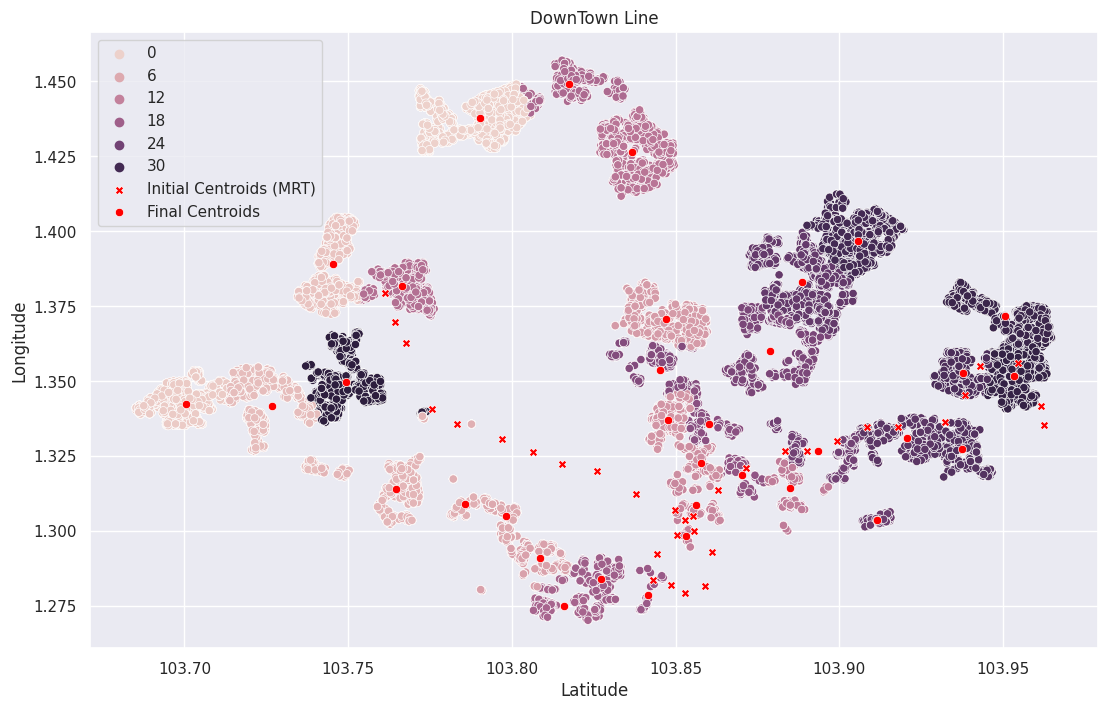

In [198]:
kmeans = KMeans(n_clusters=34, init=init_centroids_downtown, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_downtown], y=[item[1] for item in init_centroids_downtown], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('DownTown Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

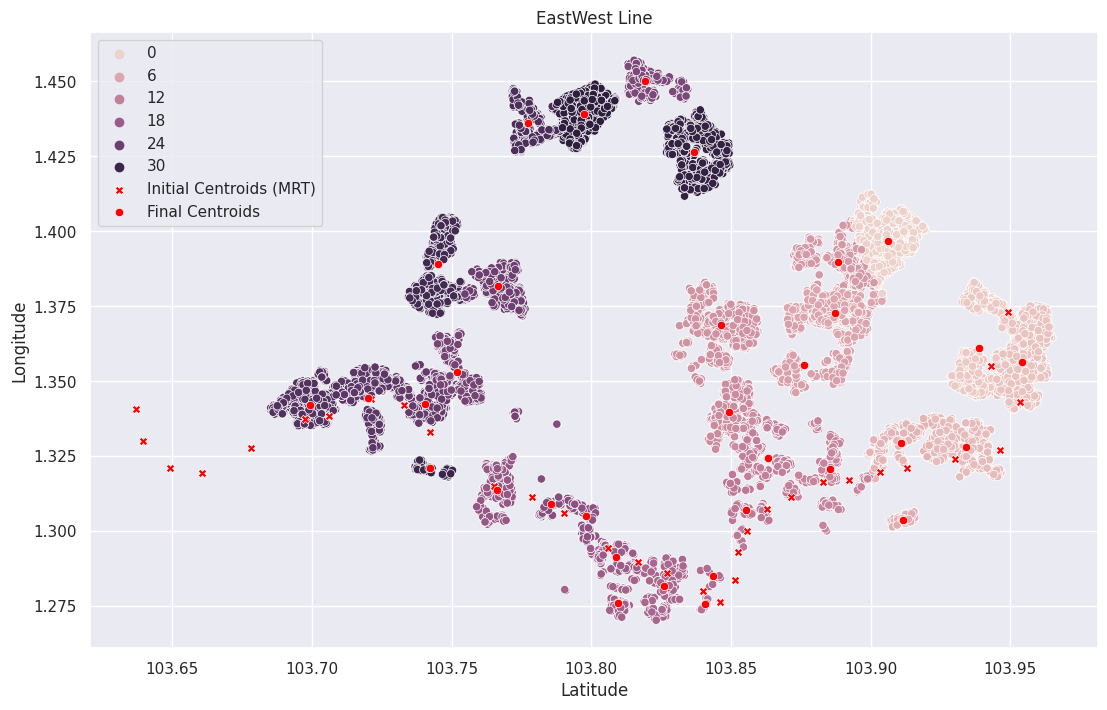

In [199]:
kmeans = KMeans(n_clusters=33, init=init_centroids_eastwest, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_eastwest], y=[item[1] for item in init_centroids_eastwest], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('EastWest Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

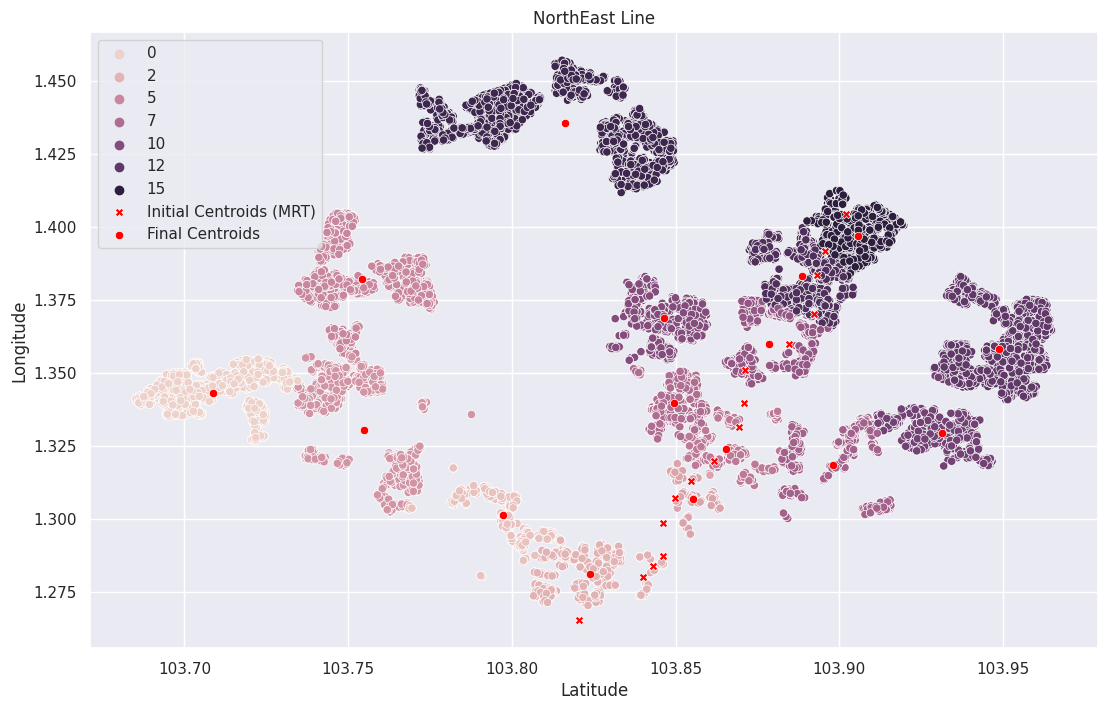

In [200]:
kmeans = KMeans(n_clusters=16, init=init_centroids_northeast, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_northeast], y=[item[1] for item in init_centroids_northeast], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('NorthEast Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

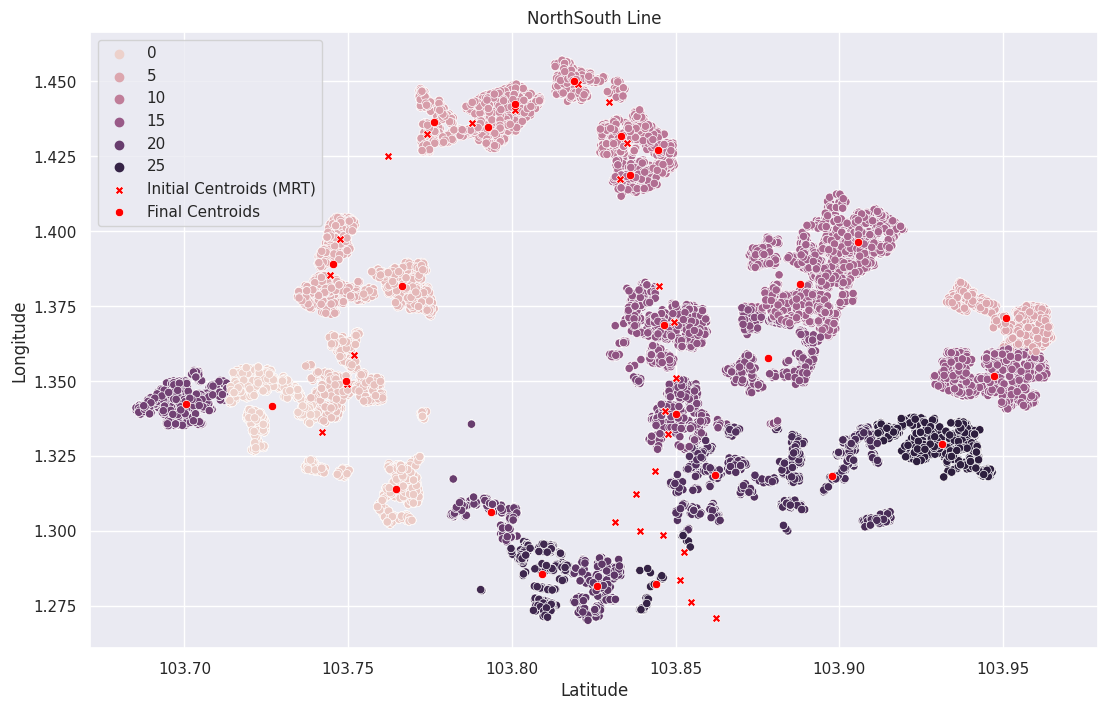

In [201]:
kmeans = KMeans(n_clusters=27, init=init_centroids_northsouth, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_northsouth], y=[item[1] for item in init_centroids_northsouth], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('NorthSouth Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

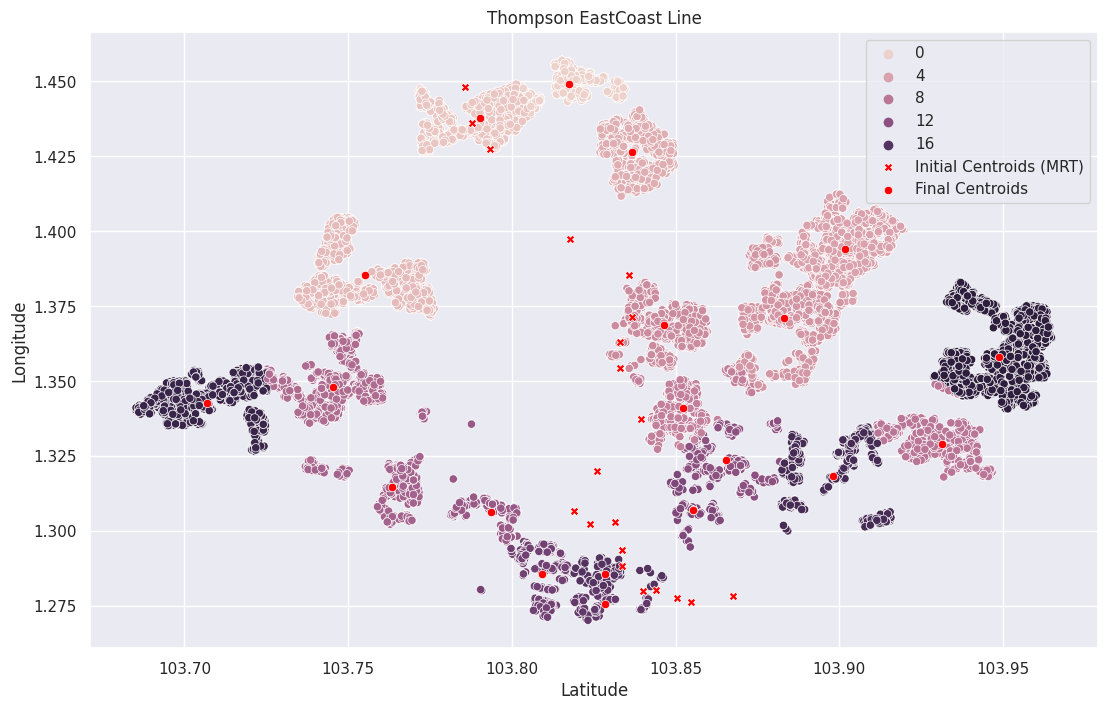

In [202]:
kmeans = KMeans(n_clusters=20, init=init_centroids_thomsoneastcoast, n_init=1, random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(13,8))

sns.scatterplot(x = training['longitude'], y = training['latitude'], hue=kmeans.labels_)
sns.scatterplot(x = [item[0] for item in init_centroids_thomsoneastcoast], y=[item[1] for item in init_centroids_thomsoneastcoast], color='red', marker='X', label='Initial Centroids (MRT)')
sns.scatterplot(x = cluster_centroids[:, 0], y = cluster_centroids[:, 1], color='red', marker='o', label='Final Centroids')
plt.title('Thompson EastCoast Line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

## Potential Function to be used to calculate the nearest mrt to a cluster centroid


In [ ]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers

    # Convert coordinates to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Calculate differences in coordinates
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply Haversine formula
    a = math.sin(delta_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c

    return distance

def find_nearest_location(reference_point, locations):
    min_distance = float('inf')
    nearest_location = None

    for index in locations.index:
        distance = haversine_distance(reference_point['latitude'], reference_point['longitude'], locations['latitude'][index], locations['longitude'][index])

        if distance < min_distance:
            min_distance = distance
            nearest_location = locations['code'][index]
            latitude = locations['latitude'][index]
            longitude = locations['longitude'][index]

    return nearest_location

